In [5]:
import numpy as np

#### local files
import sys, os
sys.path.append('..\\')
sys.path.append('..\\utilities')
from physconsts import *
from rbconsts import *

import matplotlib.pyplot as plt

## clock shift for far-detuned light

In [10]:
# compute the differential shift between F=1,F=2 ground states in a simple-minded way

TFORT = 2e-3

d1 = 2*pi*c*(1/794.978850e-9 - 1/852e-9)
d2 = 2*pi*c*(1/780.241209e-9 - 1/852e-9)
d_eff = 1/((1/d1 + 2/d2)/3) # weighted average of D lines. 
# see "Oscillator strengths of the principal series lines of Rb", table 3

omega_hfs = 2*pi*6.834682e9

eta = omega_hfs/d_eff # see "Analysis of dephasing mechanisms in a standing-wave dipole trap" by Meschede group
diff_shift = eta*TFORT*kB/hbar
print("diff. shift ~",diff_shift/(2*pi))

diff. shift ~ 9629.682985165979


Text(0.5, 0, 'T_FORT at 852 nm (mK)')

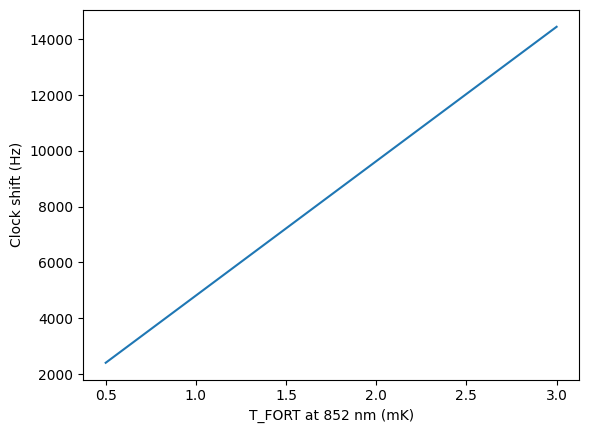

In [9]:
T_FORT_pts = np.linspace(0.5,3)*1e-3
plt.plot(T_FORT_pts*1e3, (eta*T_FORT_pts*kB/hbar)/(2*pi))
plt.ylabel("Clock shift (Hz)")
plt.xlabel("T_FORT at 852 nm (mK)")

## clock shift for far-detuned light

In [20]:
T_atom = 1e-5
T2star_motion = np.sqrt(np.e**(2/3)-1)*2*hbar/(eta*kB*T_atom)

# see "zeeman_shifts_and_microwave_dressing.nb/Effect of magnetic fluctuations
# on coherence in the presence of microwave dressing". 
# this assumes a few mG magnetic noise
T2star_B = 10

print("motional and magnetic decoherence (bare states, B0=3.23G) (s):")
print(T2star_motion,T2star_B)

print("total decoherence (s):")
# compute combined T2star value (Gaussian approx. see "Multi-qubit entanglement and algorithms"...)
print((T2star_B*T2star_motion)/(T2star_B**2+T2star_motion**2)**(1/2))

motional and magnetic decoherence (bare states, B0=3.23G) (s):
0.006435930903836122 10
total decoherence (s):
0.006435929570916417


In [22]:
# with microwave dressing we can improve the magnetic-induced decoherence by a few orders of magnitude,
# but it doesn't matter. as T2star_i for noise source i goes to inf, the total T2star approaches the 
# remaining T2star_j

T2star_B = 1000 # assumes a few mG noise and microwave dressing

print("motional and magnetic decoherence (dressed states, B0=2.7G) (s):")
print(T2star_motion,T2star_B)

print("total decoherence (s):")
# compute combined T2star value (Gaussian approx. see "Multi-qubit entanglement and algorithms"...)
print((T2star_B*T2star_motion)/(T2star_B**2+T2star_motion**2)**(1/2))

motional and magnetic decoherence (dressed states, B0=2.7G) (s):
0.006435930903836122 1000
total decoherence (s):
0.00643593090370283
